<h1>Лабораторная работа №4. Простейшие методы классификации данных</h1>

In [159]:
var = 4

import seaborn as sb
import sklearn as skl
import pandas as pd
import numpy as np
import scipy.stats as sps
import random
import math
import matplotlib.pyplot as plot
from matplotlib import markers
import itertools

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report  
from sklearn.base import clone

from yellowbrick.model_selection import feature_importances
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

<h2>Основные задания</h2>
<blockquote>
<i>
1. Загрузить данные согласно своему варианту. Данные представляют собой таблицу,
состоящую из 5 столбцов: 1 столбец – это номер класса, к которому принадлежит наблюдение, 2-4
столбцы – некоторые переменные, которыми задано текущее наблюдение.
</i>
</blockquote>

In [160]:
data = pd.read_csv(f'var{var}.csv', sep = ';')

for col in data.columns:
    for i in range(len(data)):
        if type(data.loc[i, col]) is str:
            data.at[i, col] = (data.loc[i, col]).replace(',', '.')

data = data.apply(pd.to_numeric)

print(data)

     class       x.1       x.2       x.3       x.4
0        1  0.660426  1.635270  2.676167  1.367032
1        1  1.502592  1.967276  1.791170 -1.469319
2        1  2.519069  2.090186  1.465280  0.451062
3        1  1.884270  2.030889  3.661199 -1.295809
4        1  1.977629  2.194051  2.622026  0.208893
..     ...       ...       ...       ...       ...
145      3  4.481652  3.034957  0.045425  1.604532
146      3  5.399337  3.802177  0.619945  1.247126
147      3  4.744651  2.771829 -0.236765  1.890915
148      3  2.863950  2.118877  0.766204  2.020178
149      3  4.699449  3.241893  1.294887  3.846081

[150 rows x 5 columns]


<blockquote>
<i>
2. Удалить из выборки 15 случайных наблюдений (сохранить их отдельно). Оставшуюся
выборку назовем обучающей. По ней мы будет обучать классификаторы. Сохраненные отдельно 15
наблюдений будем называть проверочной выборкой, по ней мы будем проверять качество
классификатора.
</i>
</blockquote>

In [161]:
dropcount = 15
proveData = pd.DataFrame()
eduData = data

for el in range(dropcount):
    row = random.randint(0, len(eduData) - 1)
    proveData = proveData.append([eduData.iloc[row]])
    eduData.drop(row, axis=0, inplace=True)
    eduData.reset_index(drop=True, inplace=True)

proveData.reset_index(drop=True, inplace=True)
proveData['class'] = proveData['class'].astype(int)

print(eduData)
print(proveData)

     class       x.1       x.2       x.3       x.4
0        1  0.660426  1.635270  2.676167  1.367032
1        1  1.502592  1.967276  1.791170 -1.469319
2        1  2.519069  2.090186  1.465280  0.451062
3        1  1.884270  2.030889  3.661199 -1.295809
4        1  1.977629  2.194051  2.622026  0.208893
..     ...       ...       ...       ...       ...
130      3  4.481652  3.034957  0.045425  1.604532
131      3  5.399337  3.802177  0.619945  1.247126
132      3  4.744651  2.771829 -0.236765  1.890915
133      3  2.863950  2.118877  0.766204  2.020178
134      3  4.699449  3.241893  1.294887  3.846081

[135 rows x 5 columns]
    class       x.1       x.2       x.3       x.4
0       1  1.873908  1.770824  1.778651  1.611203
1       1  0.270121  1.038038  2.482095  1.430413
2       2  0.414080 -0.680569 -2.879456 -1.112787
3       1  1.678681  2.413723  2.534281 -1.405583
4       2  1.287874 -0.069641 -1.566377  0.138764
5       1  2.101252  2.023918  1.481474 -1.405187
6       2  0.1

<blockquote>
<i>
3. Построить линейный классификатор для решения задачи классификации (см. файл Filzmoser-
Lections.pdf стр. 50-51). Метод основан на применении модели линейной регрессии для

классификации. Реализовать классификатор означает обучить его на имеющейся выборке (если это
необходимо), после чего уметь классифицировать любое новое наблюдение. Обучить классификатор
на обучающей выборке. Применить его к проверочной выборке. Вывести количество ошибок,
которое дал построенный классификатор для проверочной выборки.
</i>
</blockquote>

In [202]:
class LinearRegressionClassifier():

    def __init__(self) -> None:
        self.B = None
    
    def fit(self, features, lables) -> None:
        X = np.array(features)
        Y = np.array([[1,0,0] if l == 1 else [0,1,0] if l == 2 else [0,0,1] for l in lables])
        self.B = np.linalg.inv((X.T).dot(X)).dot(X.T).dot(Y)

    def predict(self, observation):
        observation = np.array(observation)
        result = observation.dot(self.B)
        result_class = [np.argmax(result[i]) + 1 for i in range(len(observation))]
        return np.array(result_class)


In [163]:
LRC = LinearRegressionClassifier()

features = eduData.iloc[:, 1:5].values
proveFeatures = proveData.iloc[:, 1:5].values

labels = eduData.iloc[:, 0].values
proveLabels = proveData.iloc[:, 0].values

LRC.fit(features, labels)
predLabels = LRC.predict(proveFeatures) 

errors = 0
for i,j in zip(proveLabels, predLabels):
    if i != j:
        errors += 1

print(f'accuracy: {accuracy_score(predLabels, proveLabels)}')

df = pd.DataFrame([proveLabels, predLabels],
                  index=pd.Index(['Истинные', f'Оценённые ({errors})']))
df.style

accuracy: 0.7333333333333333


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Истинные,1,1,2,1,2,1,2,3,3,1,2,2,1,3,1
Оценённые (4),1,1,2,1,2,1,3,3,3,1,1,3,3,3,1


<blockquote>
<i>
4. Реализовать метод классификации k-ближайших соседей (ссылка, kNN, k-nearest neighbors).
Для k = 3 и k = 5. Для нахождения расстояния использовать классическую Евклидову метрику.
Применить его к проверочной выборке. Вывести количество ошибок, которое дал построенный
классификатор для проверочной выборки.
</i>
</blockquote>

In [194]:
class NeighborsClassifier():

    def __init__(self, n_neighbors) -> None:
        self.neighbors = n_neighbors
        
    def fit(self,features,lables) -> None:
        self.features = features
        self.lables = lables
        self.classes = len(set(lables))

    def dist(self,a, b):
        return math.sqrt(sum([(i - j) ** 2 for i,j in zip(a,b)]))

    def predict(self, observation):
        import math
        
        testLabels = []
        for testPoint in observation:
            #Claculate distances between test point and all of the train points
            testDist = [[self.dist(testPoint, self.features[i]), int(self.lables[i]-1)] for i in range(len(self.features))]
            #How many points of each class among nearest K
            stat = [0 for i in range(self.classes)]
            for d in sorted(testDist)[0:self.neighbors]:
                stat[d[1]] += 1
            #Assign a class with the most number of occurences among K nearest neighbours
            testLabels.append(sorted(zip(stat, range(self.classes)), reverse=True)[0][1])
        testLabels = list(map(lambda i: i+1,testLabels))
        return np.array(testLabels)

In [186]:
KNC3 = NeighborsClassifier(n_neighbors=3)
KNC5 = NeighborsClassifier(n_neighbors=5)

KNC3.fit(features, labels)
KNC5.fit(features, labels)

predLabels1 = KNC3.predict(proveFeatures) 
predLabels2 = KNC5.predict(proveFeatures) 

errors1 = 0
errors2 = 0

for i,j,k in zip(proveLabels, predLabels1, predLabels2):
    if i != j:
        errors1 += 1
    if i != k:
        errors2 += 1     

print(f'accuracy: {accuracy_score(predLabels, proveLabels)}')
print(f'accuracy K = 3: {accuracy_score(predLabels1, proveLabels)}')
print(f'accuracy K = 5: {accuracy_score(predLabels2, proveLabels)}')

df = pd.DataFrame([proveLabels, predLabels, predLabels1, predLabels2],
                  index=pd.Index(['Истинные', f'LDA ({errors})', f'KNN3 ({errors1})', f'KNN5 ({errors2})']))
df.style

accuracy: 0.7333333333333333
accuracy K = 3: 0.7333333333333333
accuracy K = 5: 0.7333333333333333


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Истинные,1,1,2,1,2,1,2,3,3,1,2,2,1,3,1
LDA (4),1,1,2,1,2,1,3,3,3,1,1,3,3,3,1
KNN3 (4),1,1,2,1,2,1,2,3,1,1,1,1,3,3,1
KNN5 (4),1,1,2,1,2,1,2,3,1,1,1,1,3,3,1


<h2>Бонусные задания</h2>
<h2>Графическая иллюстрация работы классификатора.</h2>
<blockquote>
<i>
5. (0,5 балла) Построить диаграмму рассеяния некоторых 2 переменных из переменных 2-4.
Цвет и форму точек менять в зависимости от номера класса.
</i>
</blockquote>

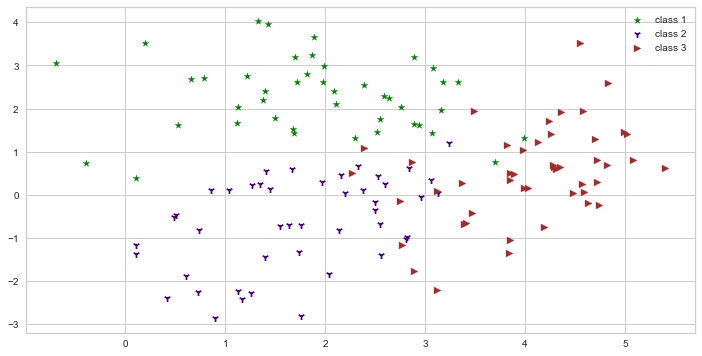

In [165]:
one = 'x.1'
two = 'x.3'

class1 = data[data['class'] == 1]
class2 = data[data['class'] == 2]
class3 = data[data['class'] == 3]

plot.figure(figsize = (12, 6))
plot.scatter(class1[one], class1[two], color='green', marker= '*', label='class 1')
plot.scatter(class2[one], class2[two], color= 'indigo', marker='1', label='class 2')
plot.scatter(class3[one], class3[two], color= 'brown', marker='>', label='class 3')
plot.legend()

<blockquote>
<i>
6. (1 балл) Построить линейный классификатор, на основе только 2 выбранных в пункте 5
переменных. Изобразить на этой диаграмме границы классов, получаемые для построенного
линейного классификатора.
</i>
</blockquote>

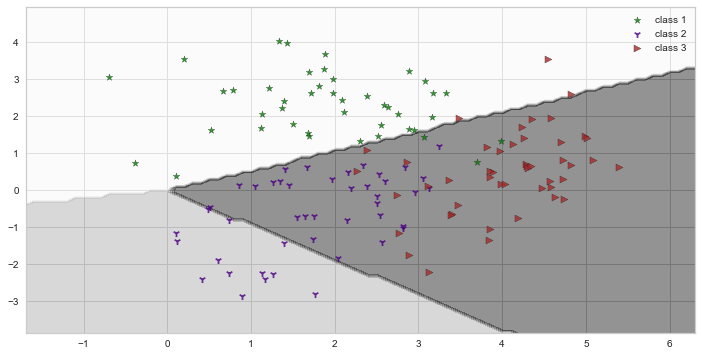

In [166]:
X = data.iloc[:, [1, 3]].values
Y = data.iloc[:, 0].values

LDA1 = LinearRegressionClassifier()
LDA1.fit(X, Y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = LDA1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plot.figure(figsize = (12, 6))
plot.contourf(xx, yy, Z, alpha=0.45)

plot.scatter(class1[one], class1[two], color='green', marker= '*', label='class 1', s=50, edgecolor="k" , alpha=0.8)
plot.scatter(class2[one], class2[two], color= 'indigo', marker='1', label='class 2', s=50, alpha=0.8)
plot.scatter(class3[one], class3[two], color= 'brown', marker='>', label='class 3', s=50, edgecolor="k" , alpha=0.8)
plot.legend()

<blockquote>
<i>
7. (0,5 балла) Построить границы остальных классификаторов, построенных на основе
выбранных 2 переменных.
</i>
</blockquote>

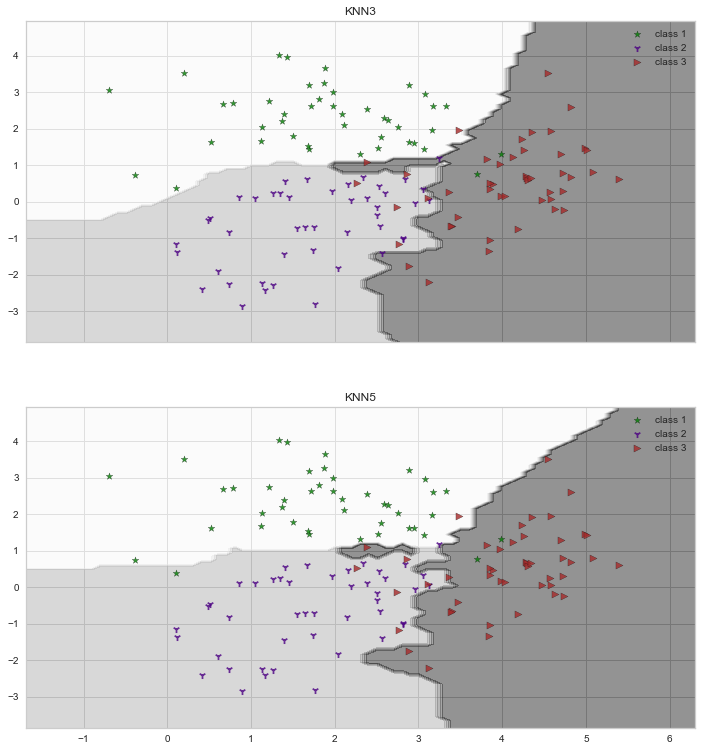

In [187]:
KNC33 = NeighborsClassifier(n_neighbors=3)
KNC55 = NeighborsClassifier(n_neighbors=5)

KNC33.fit(X, Y)
KNC55.fit(X, Y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plot.subplots(2, 1, sharex="col", sharey="row", figsize=(12, 13))

for el, clf, tt in zip(
    range(0, 2),
    [KNC33, KNC55],
    ["KNN3", "KNN5"],
):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[el].contourf(xx, yy, Z, alpha=0.45)
    axarr[el].scatter(class1[one], class1[two], color='green', marker= '*', label='class 1', s=50, edgecolor="k" , alpha=0.8)
    axarr[el].scatter(class2[one], class2[two], color= 'indigo', marker='1', label='class 2', s=50, alpha=0.8)
    axarr[el].scatter(class3[one], class3[two], color= 'brown', marker='>', label='class 3', s=50, edgecolor="k" , alpha=0.8)
    axarr[el].set_title(tt)
    axarr[el].legend()

plot.show()

<h2>Другие методы классификации</h2>
<blockquote>
<i>
8. (1 балл) Реализовать метод линейного дискриминантного анализа (см. файл Filzmoser-
Lections.pdf стр. 51-53). Обучить классификатор на обучающей выборке. Применить его к
проверочной выборке. Вывести количество ошибок, которое дал построенный классификатор для
проверочной выборки.
</i>
</blockquote>

In [168]:
def clfTest(eduData, proveData, clf):
    features = eduData.iloc[:, 1:5].values
    proveFeatures = proveData.iloc[:, 1:5].values

    labels = eduData.iloc[:, 0].values
    proveLabels = proveData.iloc[:, 0].values

    clf.fit(features, labels)
    predLabels = clf.predict(proveFeatures) 

    errors = 0
    for i,j in zip(proveLabels, predLabels):
        if i != j:
            errors += 1

    print(f'accuracy: {accuracy_score(predLabels, proveLabels)}')

    df = pd.DataFrame([proveLabels, predLabels],
                      index=pd.Index(['Истинные', f'Оценённые ({errors})']))
    return df

In [169]:
LDA = LinearDiscriminantAnalysis()
clfTest(eduData,proveData, LDA)

accuracy: 0.8


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Истинные,1,1,2,1,2,1,2,3,3,1,2,2,1,3,1
Оценённые (3),1,1,2,1,2,1,2,3,3,1,1,3,3,3,1


<blockquote>
<i>
9. (1 балл) Реализовать метод квадратичного дискриминантного анализа (см. файл Filzmoser-
Lections.pdf стр. 53). Обучить классификатор на обучающей выборке. Применить его к проверочной
выборке. Вывести количество ошибок, которое дал построенный классификатор для проверочной
выборки.
</i>
</blockquote>

In [170]:
QDA = QuadraticDiscriminantAnalysis()
clfTest(eduData,proveData, QDA)

accuracy: 0.8666666666666667


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Истинные,1,1,2,1,2,1,2,3,3,1,2,2,1,3,1
Оценённые (2),1,1,2,1,2,1,2,3,3,1,2,3,3,3,1


<blockquote>
<i>
10. (1 балл) Разобраться в методе опорных векторов (svm, support vector machine) для 2
классов. В выборке оставить наблюдения только из 2 классов. Применить готовую реализацию.
Проинтерпретировать полученные результаты. Проиллюстрировать результаты работы метода.
</i>
</blockquote>

In [171]:
spData = eduData.drop(eduData[eduData['class'] == 3].index)
spData.reset_index(drop=True, inplace=True)

spProveData = proveData.drop(proveData[proveData['class'] == 3].index)
spProveData.reset_index(drop=True, inplace=True)

SV = SVC()
clfTest(spData, spProveData, SV)

accuracy: 0.8333333333333334


,0,1,2,3,4,5,6,7,8,9,10,11
Истинные,1,1,2,1,2,1,2,1,2,2,1,1
Оценённые (2),1,1,2,1,2,1,2,1,1,1,1,1


<blockquote>
<i>
11. (1 балл) Для всех реализованных методов классификации данных реализовать
описанный выше метод сравнения.
</i>
</blockquote>

In [188]:
def getDataz(dataT, p):
    proveDataT = pd.DataFrame()
    eduDataT = dataT

    ln = int(len(eduDataT['x.1']) * p)
    for el in range(ln):
        row = random.randint(0, len(eduDataT) - 1)
        proveDataT = proveDataT.append([eduDataT.iloc[row]])
        eduDataT = eduDataT.drop(row, axis=0)
        eduDataT = eduDataT.reset_index(drop=True)

    proveDataT = proveDataT.reset_index(drop=True)
    proveDataT['class'] = proveDataT['class'].astype(int)
    
    return eduDataT, proveDataT

def getErrorz(eduDataR, proveDataR, clfR):
    featuresR = eduDataR.iloc[:, 1:5].values
    proveFeaturesR = proveDataR.iloc[:, 1:5].values

    labelsR = eduDataR.iloc[:, 0].values
    proveLabelsR = proveDataR.iloc[:, 0].values

    clfR.fit(featuresR, labelsR)
    predLabelsR = clfR.predict(proveFeaturesR) 

    errors = 0
    for i,j in zip(proveLabelsR, predLabelsR):
        if i != j:
            errors += 1
    return errors
    #return accuracy_score(predLabelsR, proveLabelsR)

[3.71, 1.64, 1.84, 1.62, 1.44, 1.68]


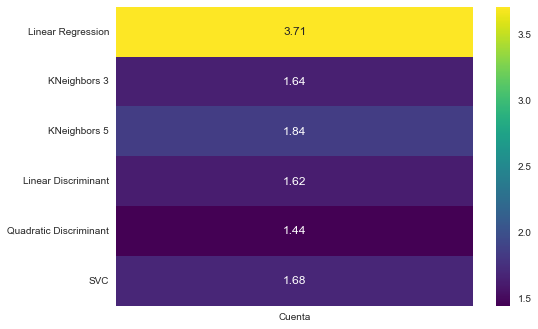

In [201]:
M = 100
p = 0.1

errList = []

C1 = LinearRegressionClassifier()
C2 = NeighborsClassifier(n_neighbors=3)
C3 = NeighborsClassifier(n_neighbors=5)
C4 = LinearDiscriminantAnalysis()
C5 = QuadraticDiscriminantAnalysis()
C6 = SVC()

for c in [C1, C2, C3, C4, C5, C6]:
    temp = []
    for i in range(M):
        ed, pr = getDataz(data, 0.1)
        if c != C1 and c != C2 and c!=C3:
            c = skl.base.clone(c)
        temp.append(getErrorz(ed, pr, c))
    errList.append(np.mean(temp))
    
print(errList)
df = pd.DataFrame({"Cuenta": errList},
                  index=["Linear Regression", "KNeighbors 3", "KNeighbors 5", "Linear Discriminant", "Quadratic Discriminant", "SVC"])

sb.heatmap(df, annot=True, fmt="g", cmap='viridis')
plot.show()

<blockquote>
<i>
Уменьшение числа переменных в модели*
12. (2 балла) На практике часто бывает так, что использование всех имеющихся
переменных только ухудшает качество итоговой модели (метода). Часто имеет смысл удалить из
модели часть переменных, в этом случае качество классификации (прогноза и т.п.) может
значительно улучшиться. Придумать (найти в литературе) подходы по удалению «лишних»
переменных. Оставить лишь 2 переменных в модели. Пункты 5-7 реализовать для выбранных двух
переменных.
</i>
</blockquote>

<blockquote>
<i>
Обратное исключение:
</i>
</blockquote>

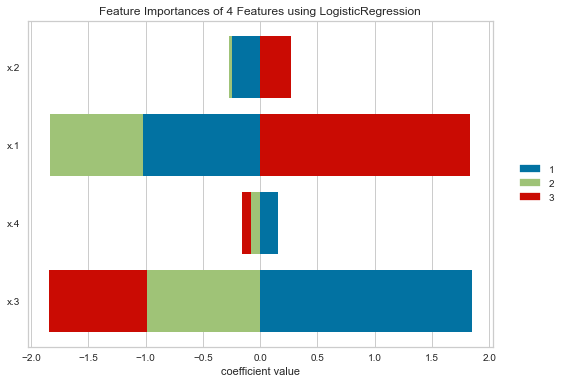

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 4 Features using LogisticRegression'}, xlabel='coefficient value'>,
                   estimator=LogisticRegression(),
                   labels=['x.1', 'x.2', 'x.3', 'x.4'], relative=False,
                   stack=True)

In [174]:
estimator = LogisticRegression()
selector = RFE(estimator, n_features_to_select=2, step=1)
selector.fit(features, labels)

feature_importances(estimator, features, labels, stack=True, labels=['x.1', 'x.2', 'x.3', 'x.4'], relative=False)

<blockquote>
<i>
Случайные леса:
</i>
</blockquote>

Feature importances:  [0.37599114 0.19552374 0.39546159 0.03302354]
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Visualizing Important Features')

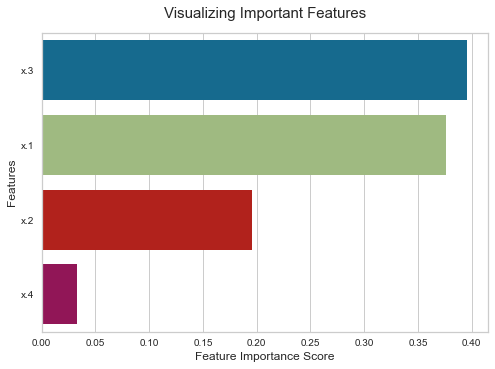

In [175]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3,
                                 bootstrap=True, n_jobs=-1,
                                 random_state=0)
rf.fit(features, labels)

feature_imp = pd.Series(rf.feature_importances_, 
                        index=['x.1', 'x.2', 'x.3', 'x.4']).sort_values(ascending=False)

print('Feature importances: ', rf.feature_importances_)
print(sb.barplot(x=feature_imp, y=feature_imp.index))
plot.xlabel('Feature Importance Score', fontsize=12)
plot.ylabel('Features', fontsize=12)
plot.title("Visualizing Important Features", fontsize=15, pad=15)

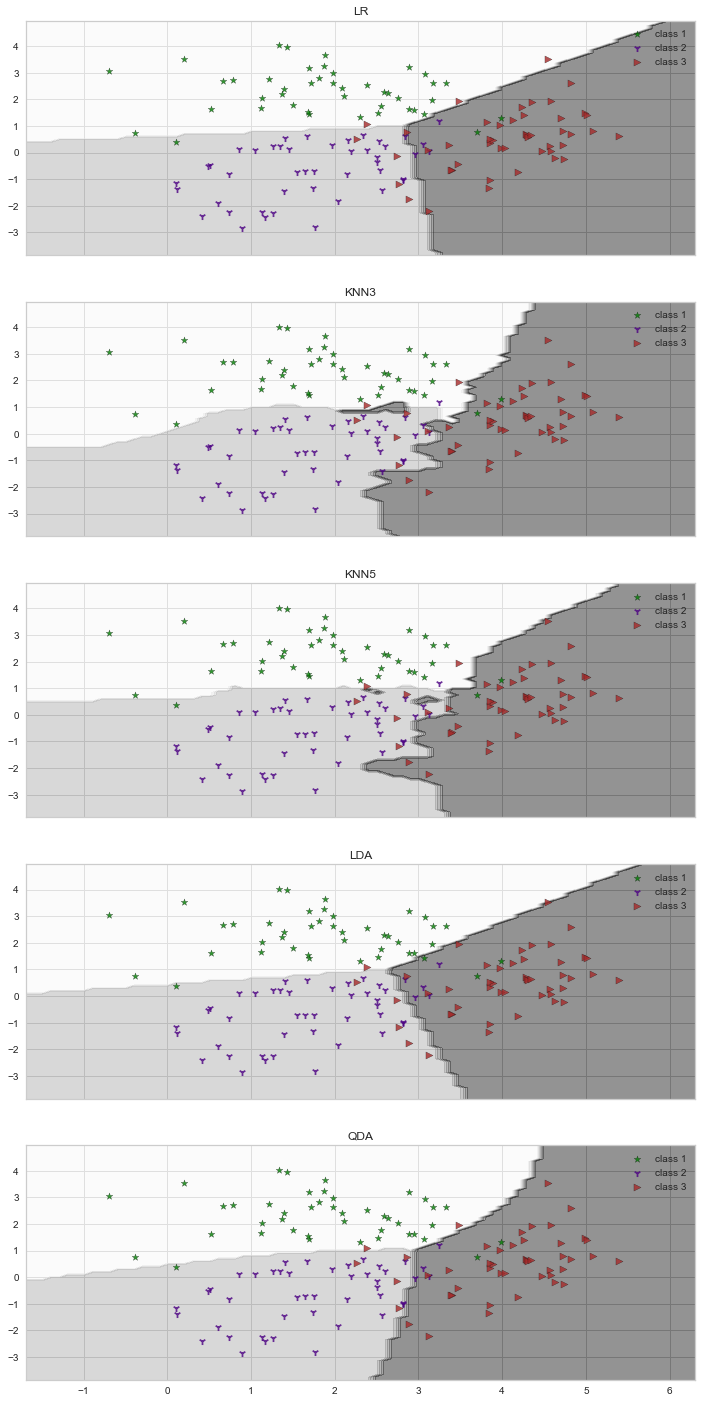

In [176]:
X = data.iloc[:, [1, 3]].values
Y = data.iloc[:, 0].values

one = 'x.1'
two = 'x.3'

LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
LR = LogisticRegression()
KNC33 = KNeighborsClassifier(n_neighbors=3)
KNC55 = KNeighborsClassifier(n_neighbors=5)

LR.fit(X, Y)
LDA.fit(X, Y)
QDA.fit(X, Y)
KNC33.fit(X, Y)
KNC55.fit(X, Y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plot.subplots(5, 1, sharex="col", sharey="row", figsize=(12, 25))

for el, clf, tt in zip(
    range(0, 5),
    [LR, KNC33, KNC55, LDA, QDA],
    ["LR", "KNN3", "KNN5", "LDA", "QDA"],
):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[el].contourf(xx, yy, Z, alpha=0.45)
    axarr[el].scatter(class1[one], class1[two], color='green', marker= '*', label='class 1', s=50, edgecolor="k" , alpha=0.8)
    axarr[el].scatter(class2[one], class2[two], color= 'indigo', marker='1', label='class 2', s=50, alpha=0.8)
    axarr[el].scatter(class3[one], class3[two], color= 'brown', marker='>', label='class 3', s=50, edgecolor="k" , alpha=0.8)
    axarr[el].set_title(tt)
    axarr[el].legend()

plot.show()